In [1]:
import matplotlib.pyplot as plt
from chart_generator import chart_top_products, chart_confidence_hist
from analysis_utils import load_results_from_folder, load_catalog_items
cooler_results_folder = "../data/results_json/cooler_results"
plt.style.use("ggplot")


In [2]:
df_results = load_results_from_folder(cooler_results_folder)
df_results.head()

,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,category_label
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",Fage Total 0%
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",Fage Total 5%
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",Yeo Valley organic Greek style
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",Alpro Vanilla
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",Yeo Valley organic Natural


In [3]:
df_catalog = load_catalog_items()
df_catalog.head()

,uuid,status,thumbnail_url,name,barcode,custom_id,height,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,a9c9ef0b-3451-453e-9723-ec28070e29d0,ONBOARDED,https://storage.googleapis.com/staging-zia-web...,Sainsbury's Natural Yoghurt,00146098,None,None,None,None,Sainsbury's,,Plastic Tub,Natural,,[],2025-11-17T16:10:12.979105,2025-11-17T16:10:20.410252
1,73f1bdf5-31ff-4d9c-83c7-738c2137942a,ONBOARDED,https://storage.googleapis.com/staging-zia-web...,Alpro Plain Greek style,5411188121213,None,None,None,None,Alpro,,Plastic Cup,Plain,,[],2025-11-17T16:10:14.054107,2025-11-17T16:11:04.409721
2,4c847cbd-8d45-4817-9728-0df33f15fcd4,ONBOARDED,https://storage.googleapis.com/staging-zia-web...,Fage Total 0%,5201054017418,None,None,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
3,51fefcc6-f3d5-43fd-9480-74e260f731bf,ONBOARDED,https://storage.googleapis.com/staging-zia-web...,Yeo Valley organic Greek style,5036589200970,None,None,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
4,aee9f6a0-0dc2-4654-95c8-841592b8c5cf,ONBOARDED,https://storage.googleapis.com/staging-zia-web...,Nivea men cool kick,4005808298174,None,None,None,None,Nivea,250ml,Bottle,,,[],2025-11-17T16:10:16.018427,2025-11-17T16:13:25.698138


In [4]:
df_catalog.columns

Index(['uuid', 'status', 'thumbnail_url', 'name', 'barcode', 'custom_id',
       'height', 'width', 'depth', 'brand', 'size', 'container_type',
       'flavour', 'packaging_size', 'custom_props', 'created_at',
       'updated_at'],
      dtype='object')

In [5]:

df_results["product_uuid"] = df_results["product_uuid"].astype(str)

df_catalog["uuid"] = df_catalog["uuid"].astype(str)


df_joined = df_results.merge(
    df_catalog,
    left_on="product_uuid",
    right_on="uuid",
    how="left",
    suffixes=("_det", "_cat")
)

df_joined.head()


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",...,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",...,None,None,Fage,,Cup,,,[],2025-11-17T16:10:18.647057,2025-11-17T16:11:48.138322
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",...,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",...,None,None,Alpro,,,Vanilla,,[],2025-11-17T16:10:17.584066,2025-11-17T16:11:07.720884
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320


In [6]:
df_joined[df_joined['product_uuid'].notna()].head()


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",...,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",...,None,None,Fage,,Cup,,,[],2025-11-17T16:10:18.647057,2025-11-17T16:11:48.138322
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",...,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",...,None,None,Alpro,,,Vanilla,,[],2025-11-17T16:10:17.584066,2025-11-17T16:11:07.720884
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320


In [7]:
df_joined[df_joined['name'].notna()].head()


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",...,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",...,None,None,Fage,,Cup,,,[],2025-11-17T16:10:18.647057,2025-11-17T16:11:48.138322
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",...,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",...,None,None,Alpro,,,Vanilla,,[],2025-11-17T16:10:17.584066,2025-11-17T16:11:07.720884
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320


In [8]:
df_joined["uuid"].isna().value_counts()


uuid
False    82
True     54
Name: count, dtype: int64

In [9]:
df_joined.info()
df_joined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_url              136 non-null    object 
 1   category_id            136 non-null    int64  
 2   bbox                   136 non-null    object 
 3   area                   136 non-null    int64  
 4   score                  112 non-null    float64
 5   modalities             136 non-null    object 
 6   alternate_predictions  136 non-null    object 
 7   product_uuid           136 non-null    object 
 8   product_name           82 non-null     object 
 9   product_tags           82 non-null     object 
 10  category_label         136 non-null    object 
 11  uuid                   82 non-null     object 
 12  status                 82 non-null     object 
 13  thumbnail_url          82 non-null     object 
 14  name                   82 non-null     object 
 15  barcod

,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",...,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",...,None,None,Fage,,Cup,,,[],2025-11-17T16:10:18.647057,2025-11-17T16:11:48.138322
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",...,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",...,None,None,Alpro,,,Vanilla,,[],2025-11-17T16:10:17.584066,2025-11-17T16:11:07.720884
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320


In [10]:
df_products = df_joined[df_joined["product_uuid"].notna()].copy()


In [11]:
df_products.shape
df_products.head()

,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
0,https://storage.googleapis.com/staging-zia-web...,1,"[45, 607, 668, 518]",346024,0.797279,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.782383458}, {'c...",4c847cbd-8d45-4817-9728-0df33f15fcd4,Fage Total 0%,"[""yoghurt""]",...,None,None,Fage,,Plastic Tub,,,[],2025-11-17T16:10:14.851492,2025-11-17T16:11:44.328298
1,https://storage.googleapis.com/staging-zia-web...,2,"[182, 1435, 643, 445]",286135,0.851309,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.82177541}, {'ca...",89d4c883-33dc-4ae4-a531-0264e37c7bbc,Fage Total 5%,"[""yoghurt""]",...,None,None,Fage,,Cup,,,[],2025-11-17T16:10:18.647057,2025-11-17T16:11:48.138322
2,https://storage.googleapis.com/staging-zia-web...,3,"[432, 2132, 448, 643]",288064,0.725301,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.576786492}, {'c...",51fefcc6-f3d5-43fd-9480-74e260f731bf,Yeo Valley organic Greek style,"[""yoghurt""]",...,None,None,Yeo Valley,,Plastic Pot,Natural,,[],2025-11-17T16:10:15.185287,2025-11-17T16:10:22.686883
3,https://storage.googleapis.com/staging-zia-web...,4,"[482, 2638, 424, 640]",271360,0.627161,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.496504622}, {'c...",5bdb53d9-59ae-4eed-b73e-19a499bfe496,Alpro Vanilla,"[""yoghurt""]",...,None,None,Alpro,,,Vanilla,,[],2025-11-17T16:10:17.584066,2025-11-17T16:11:07.720884
4,https://storage.googleapis.com/staging-zia-web...,5,"[490, 3124, 419, 636]",266484,0.718528,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.639543298}, {'c...",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320


In [12]:
df_products["name"].value_counts().head(20)


name
Yeo Valley organic Blueberry        26
Onken Strawberry                    16
Yeo Valley organic Greek style      10
Yeo Valley organic Vanilla          10
Yeo Valley organic Natural           4
Alpro Plain Greek style              4
Fage Total 0%                        2
Fage Total 5%                        2
Alpro Vanilla                        2
Sainsbury's Greek style              2
Sainsbury's Greek style Fat free     2
Sainsbury's Natural Yoghurt          2
Name: count, dtype: int64

In [13]:
df_products["brand"].value_counts().head(10)


brand
Yeo Valley     50
Onken          16
Alpro           6
Sainsbury's     6
Fage            4
Name: count, dtype: int64

In [14]:
df_products["product_uuid"].value_counts().head()


product_uuid
None                                    54
e59c3090-8001-4dec-8604-9a647b120181    26
2b7c6b5d-8ccf-44ba-bdc0-bcf99c8defe2    16
51fefcc6-f3d5-43fd-9480-74e260f731bf    10
5176aa60-83e8-4502-840a-25524e503150    10
Name: count, dtype: int64

In [15]:
df_products["score"].describe()


count    112.000000
mean       0.754546
std        0.164422
min        0.511623
25%        0.634925
50%        0.697845
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [16]:
df_products.sort_values("score", ascending=False).head(10)


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
134,https://storage.googleapis.com/staging-zia-web...,0,"[3846, 441, 185, 122]",22570,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 3, 'score': 0.1328399972}, {'...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,https://storage.googleapis.com/staging-zia-web...,0,"[0, 107, 937, 257]",240809,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.241472686}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,https://storage.googleapis.com/staging-zia-web...,0,"[2171, 110, 289, 247]",71383,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 9, 'score': 0.2599879525}, {'...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,https://storage.googleapis.com/staging-zia-web...,0,"[2501, 102, 308, 250]",77000,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 9, 'score': 0.2848876975}, {'...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,https://storage.googleapis.com/staging-zia-web...,0,"[2850, 0, 260, 227]",59020,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.41468126}, {'ca...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,https://storage.googleapis.com/staging-zia-web...,0,"[3119, 0, 283, 224]",63392,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.347988692}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,https://storage.googleapis.com/staging-zia-web...,0,"[3383, 0, 293, 219]",64167,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 5, 'score': 0.465619788}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,https://storage.googleapis.com/staging-zia-web...,0,"[3700, 1254, 248, 107]",26536,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.13889885}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://storage.googleapis.com/staging-zia-web...,0,"[879, 100, 702, 267]",187434,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.224719308}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,https://storage.googleapis.com/staging-zia-web...,0,"[3730, 835, 166, 127]",21082,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.15790952}, {'ca...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_products.sort_values("score").head(10)


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
18,https://storage.googleapis.com/staging-zia-web...,1,"[0, 520, 191, 311]",59401,0.511623,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.450654136}]",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320
86,https://storage.googleapis.com/staging-zia-web...,1,"[0, 520, 191, 311]",59401,0.511623,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.450654136}]",4f05f8f9-d145-4ad8-a0e6-3f9fe840d5c2,Yeo Valley organic Natural,"[""yoghurt""]",...,None,None,Yeo Valley,,Cup,Natural,,[],2025-11-17T16:10:20.009480,2025-11-17T16:11:08.118320
105,https://storage.googleapis.com/staging-zia-web...,4,"[1540, 852, 236, 214]",50504,0.514052,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 3, 'score': 0.47085597}]",e59c3090-8001-4dec-8604-9a647b120181,Yeo Valley organic Blueberry,"[""yoghurt""]",...,None,None,Yeo Valley,None,Cup,Blueberry with a hint of lime,None,[],2025-11-17T16:10:19.552522,2025-11-17T16:13:19.805470
37,https://storage.googleapis.com/staging-zia-web...,4,"[1540, 852, 236, 214]",50504,0.514052,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 3, 'score': 0.47085597}]",e59c3090-8001-4dec-8604-9a647b120181,Yeo Valley organic Blueberry,"[""yoghurt""]",...,None,None,Yeo Valley,None,Cup,Blueberry with a hint of lime,None,[],2025-11-17T16:10:19.552522,2025-11-17T16:13:19.805470
82,https://storage.googleapis.com/staging-zia-web...,10,"[1521, 3085, 411, 629]",258519,0.518337,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.481858048000000...",73f1bdf5-31ff-4d9c-83c7-738c2137942a,Alpro Plain Greek style,"[""yoghurt""]",...,None,None,Alpro,,Plastic Cup,Plain,,[],2025-11-17T16:10:14.054107,2025-11-17T16:11:04.409721
14,https://storage.googleapis.com/staging-zia-web...,10,"[1521, 3085, 411, 629]",258519,0.518337,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 7, 'score': 0.481858048000000...",73f1bdf5-31ff-4d9c-83c7-738c2137942a,Alpro Plain Greek style,"[""yoghurt""]",...,None,None,Alpro,,Plastic Cup,Plain,,[],2025-11-17T16:10:14.054107,2025-11-17T16:11:04.409721
102,https://storage.googleapis.com/staging-zia-web...,4,"[1259, 853, 250, 219]",54750,0.531178,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 3, 'score': 0.48210531}]",e59c3090-8001-4dec-8604-9a647b120181,Yeo Valley organic Blueberry,"[""yoghurt""]",...,None,None,Yeo Valley,None,Cup,Blueberry with a hint of lime,None,[],2025-11-17T16:10:19.552522,2025-11-17T16:13:19.805470
34,https://storage.googleapis.com/staging-zia-web...,4,"[1259, 853, 250, 219]",54750,0.531178,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 3, 'score': 0.48210531}]",e59c3090-8001-4dec-8604-9a647b120181,Yeo Valley organic Blueberry,"[""yoghurt""]",...,None,None,Yeo Valley,None,Cup,Blueberry with a hint of lime,None,[],2025-11-17T16:10:19.552522,2025-11-17T16:13:19.805470
76,https://storage.googleapis.com/staging-zia-web...,7,"[1025, 2103, 432, 644]",278208,0.534767,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.467235404}]",2b7c6b5d-8ccf-44ba-bdc0-bcf99c8defe2,Onken Strawberry,"[""yoghurt""]",...,None,None,Onken,None,Bowl,Strawberry,None,[],2025-11-17T16:10:15.934192,2025-11-17T16:10:24.111085
8,https://storage.googleapis.com/staging-zia-web...,7,"[1025, 2103, 432, 644]",278208,0.534767,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.467235404}]",2b7c6b5d-8ccf-44ba-bdc0-bcf99c8defe2,Onken Strawberry,"[""yoghurt""]",...,None,None,Onken,None,Bowl,Strawberry,None,[],2025-11-17T16:10:15.934192,2025-11-17T16:10:24.111085


<Axes: >

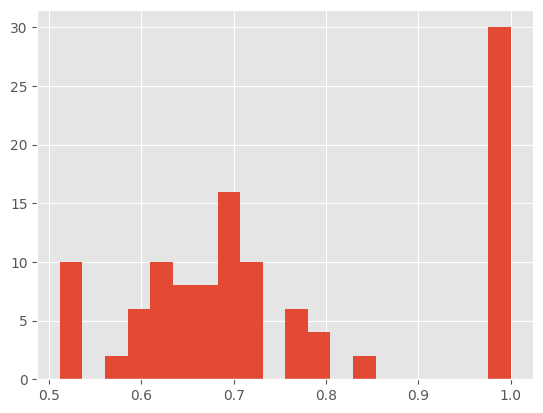

In [18]:
df_products["score"].hist(bins=20)


In [19]:
df_products.groupby("name")["area"].mean().sort_values(ascending=False).head()


name
Fage Total 0%                       346024.0
Sainsbury's Greek style Fat free    307975.0
Alpro Plain Greek style             303579.0
Sainsbury's Natural Yoghurt         296400.0
Fage Total 5%                       286135.0
Name: area, dtype: float64

In [20]:
df_products[["name", "area"]].sort_values("area", ascending=False).head()


,name,area
5,Yeo Valley organic Blueberry,445784
73,Yeo Valley organic Blueberry,445784
84,Onken Strawberry,391138
16,Onken Strawberry,391138
74,Yeo Valley organic Blueberry,352308


In [21]:
df_products.groupby("image_url").size().sort_values(ascending=False).head()


image_url
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/5fdd22e7-a118-4ad6-9867-f3c91222b32d.jpg    51
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/96833213-9a89-47ca-aaae-8f0691f4583a.jpg    51
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/135eeaad-3293-484e-bae8-2f931ec92645.jpg    17
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/c2348056-e3a8-4147-a064-1f2fb8f14fc4.jpg    17
dtype: int64

In [22]:
df_missing_catalog = df_joined[df_joined["product_uuid"].notna() & df_joined["name"].isna()]
df_missing_catalog


,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
12,https://storage.googleapis.com/staging-zia-web...,0,"[1500, 2041, 442, 679]",300118,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.44930026}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,https://storage.googleapis.com/staging-zia-web...,0,"[0, 107, 937, 257]",240809,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.241472686}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,https://storage.googleapis.com/staging-zia-web...,0,"[24, 814, 202, 271]",54742,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.316075836}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,https://storage.googleapis.com/staging-zia-web...,7,"[34, 374, 226, 126]",28476,NaN,"{'price': [{'score': 1.0, 'value': '3, 0.30'}]...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,https://storage.googleapis.com/staging-zia-web...,7,"[88, 1310, 234, 112]",26208,NaN,"{'price': [{'score': 1.0, 'value': '2.35, 0.52...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,https://storage.googleapis.com/staging-zia-web...,7,"[705, 1304, 207, 109]",22563,NaN,"{'price': [{'score': 1.0, 'value': '1.75, 2.40...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,https://storage.googleapis.com/staging-zia-web...,7,"[858, 380, 206, 120]",24720,NaN,"{'price': [{'score': 1.0, 'value': '3.30, 0.82...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://storage.googleapis.com/staging-zia-web...,0,"[879, 100, 702, 267]",187434,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.224719308}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://storage.googleapis.com/staging-zia-web...,7,"[1279, 1296, 193, 104]",20072,NaN,"{'price': [{'score': 1.0, 'value': '1.75'}], '...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,https://storage.googleapis.com/staging-zia-web...,7,"[1675, 382, 194, 118]",22892,NaN,"{'price': [{'score': 1.0, 'value': '2.40, 0.80...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_missing_catalog = df_joined[df_joined["product_uuid"].notna() & df_joined["name"].isna()]
df_missing_catalog

,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
12,https://storage.googleapis.com/staging-zia-web...,0,"[1500, 2041, 442, 679]",300118,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.44930026}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,https://storage.googleapis.com/staging-zia-web...,0,"[0, 107, 937, 257]",240809,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.241472686}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,https://storage.googleapis.com/staging-zia-web...,0,"[24, 814, 202, 271]",54742,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.316075836}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,https://storage.googleapis.com/staging-zia-web...,7,"[34, 374, 226, 126]",28476,NaN,"{'price': [{'score': 1.0, 'value': '3, 0.30'}]...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,https://storage.googleapis.com/staging-zia-web...,7,"[88, 1310, 234, 112]",26208,NaN,"{'price': [{'score': 1.0, 'value': '2.35, 0.52...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,https://storage.googleapis.com/staging-zia-web...,7,"[705, 1304, 207, 109]",22563,NaN,"{'price': [{'score': 1.0, 'value': '1.75, 2.40...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,https://storage.googleapis.com/staging-zia-web...,7,"[858, 380, 206, 120]",24720,NaN,"{'price': [{'score': 1.0, 'value': '3.30, 0.82...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://storage.googleapis.com/staging-zia-web...,0,"[879, 100, 702, 267]",187434,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.224719308}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://storage.googleapis.com/staging-zia-web...,7,"[1279, 1296, 193, 104]",20072,NaN,"{'price': [{'score': 1.0, 'value': '1.75'}], '...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,https://storage.googleapis.com/staging-zia-web...,7,"[1675, 382, 194, 118]",22892,NaN,"{'price': [{'score': 1.0, 'value': '2.40, 0.80...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_joined["category_label"].value_counts()


category_label
object                              30
Yeo Valley organic Blueberry        26
price                               24
Onken Strawberry                    16
Yeo Valley organic Greek style      10
Yeo Valley organic Vanilla          10
Yeo Valley organic Natural           4
Alpro Plain Greek style              4
Fage Total 0%                        2
Fage Total 5%                        2
Alpro Vanilla                        2
Sainsbury's Greek style              2
Sainsbury's Greek style Fat free     2
Sainsbury's Natural Yoghurt          2
Name: count, dtype: int64

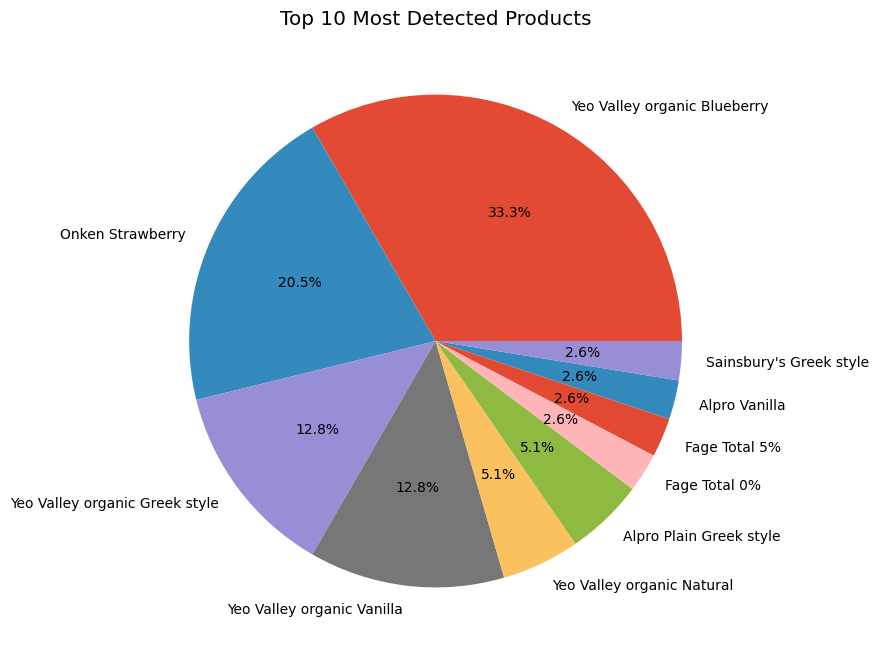

In [25]:
top_products = df_products["name"].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct="%1.1f%%")
plt.title("Top 10 Most Detected Products")
plt.show()


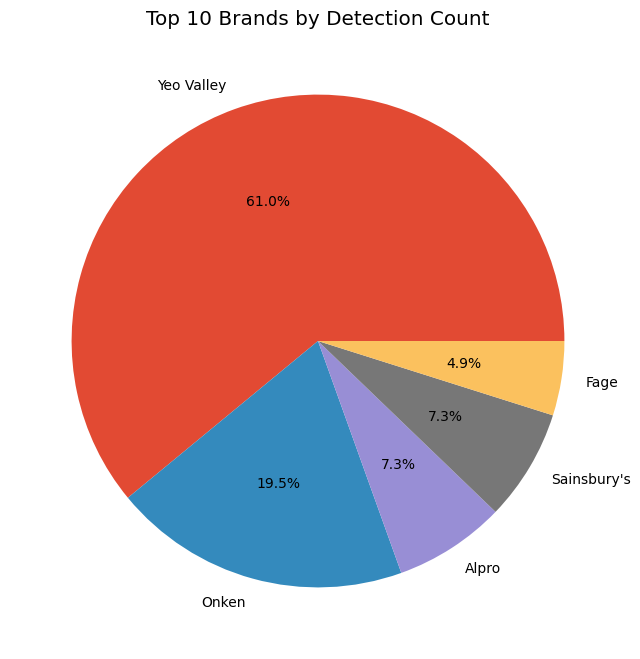

In [26]:
brand_counts = df_products["brand"].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct="%1.1f%%")
plt.title("Top 10 Brands by Detection Count")
plt.show()


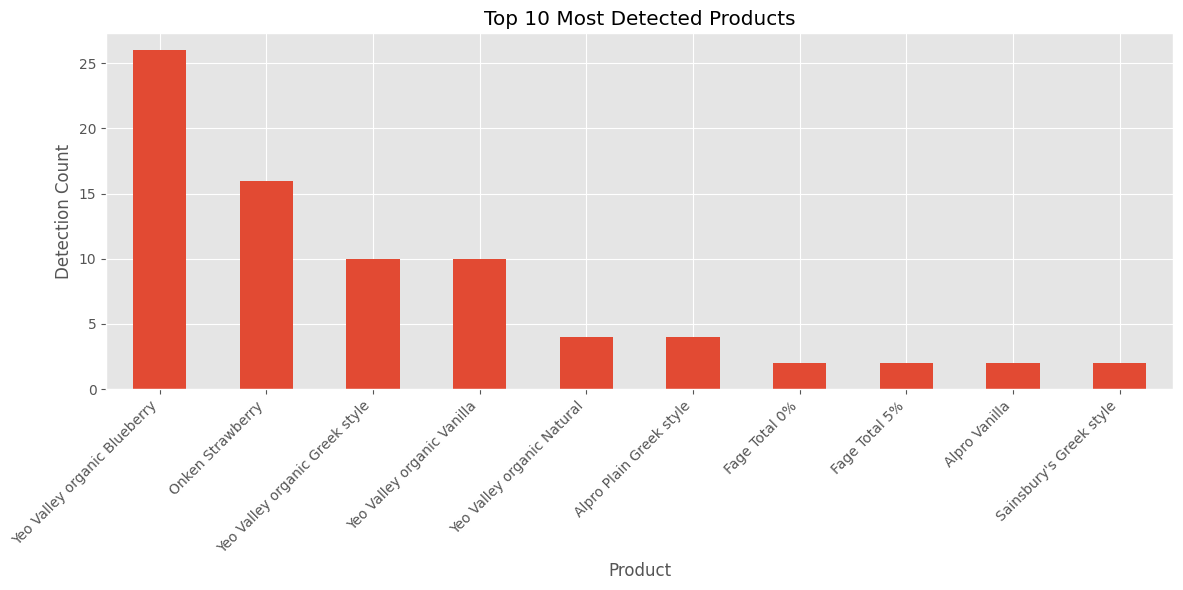

In [27]:
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar")
plt.xlabel("Product")
plt.ylabel("Detection Count")
plt.title("Top 10 Most Detected Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


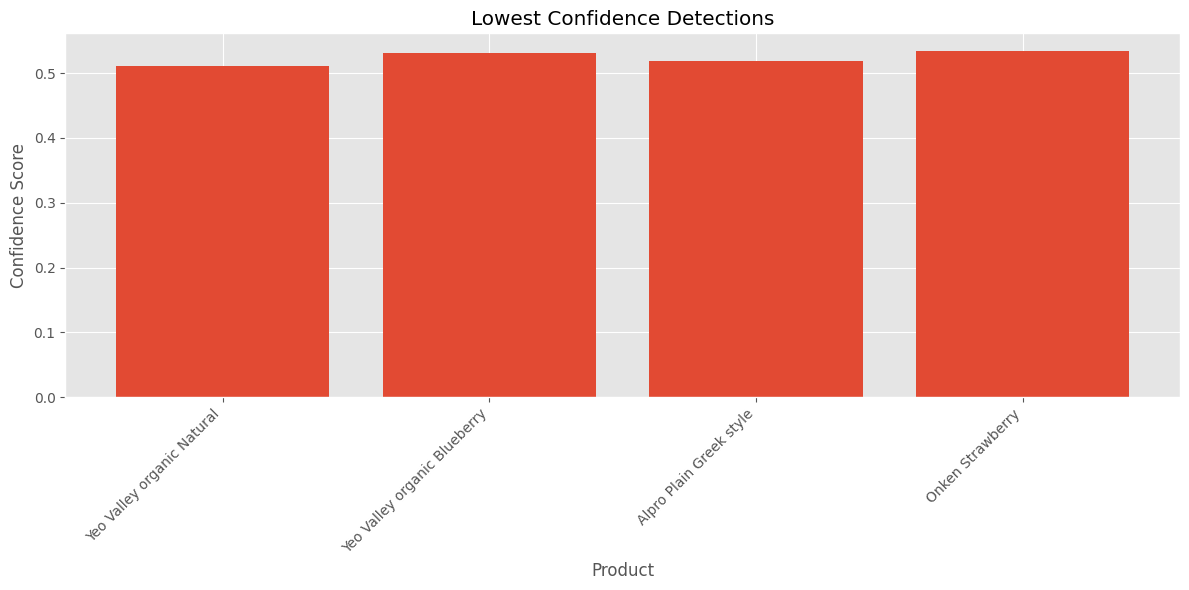

In [28]:
lowest_conf = df_products.sort_values("score").head(10)

plt.figure(figsize=(12, 6))
plt.bar(lowest_conf["name"], lowest_conf["score"])
plt.xlabel("Product")
plt.ylabel("Confidence Score")
plt.title("Lowest Confidence Detections")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


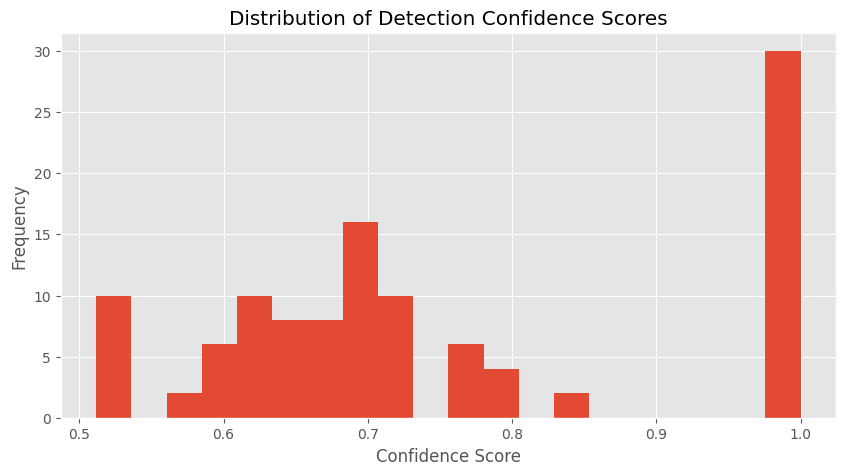

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(df_products["score"].dropna(), bins=20)
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Detection Confidence Scores")
plt.show()


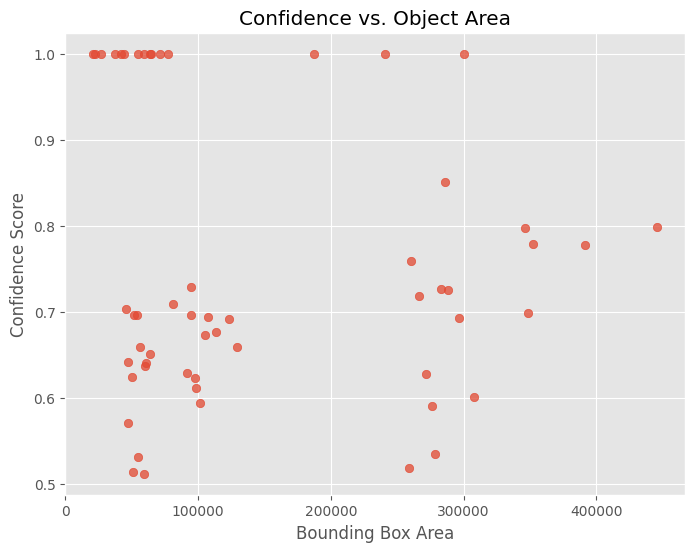

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df_products["area"], df_products["score"], alpha=0.5)
plt.xlabel("Bounding Box Area")
plt.ylabel("Confidence Score")
plt.title("Confidence vs. Object Area")
plt.show()


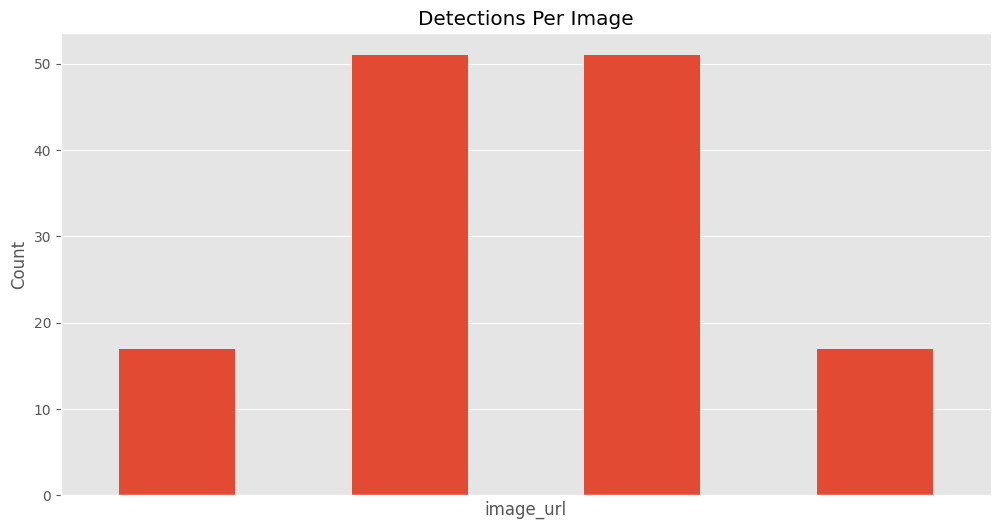

In [31]:
detections_per_image = df_products.groupby("image_url").size()

plt.figure(figsize=(12, 6))
detections_per_image.plot(kind="bar")
plt.title("Detections Per Image")
plt.ylabel("Count")
plt.xticks([])
plt.show()


In [32]:
df_joined.to_csv("outputs/df_joined.csv", index=False)
df_products.to_csv("outputs/df_products_only.csv", index=False)


In [33]:
plt.savefig("outputs/charts/top_products.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

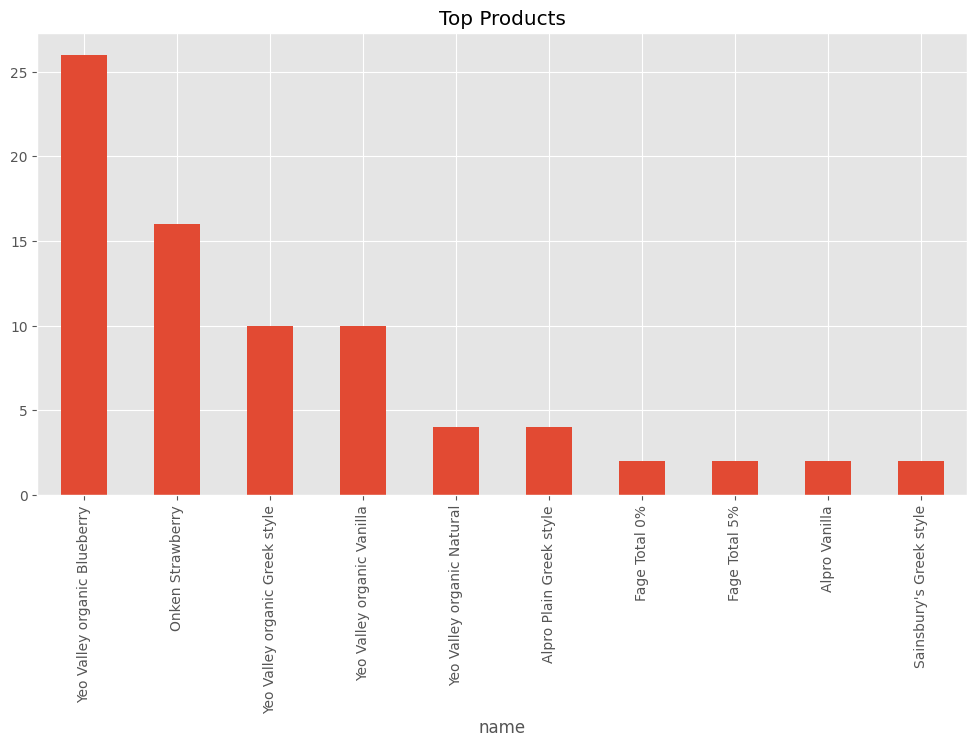

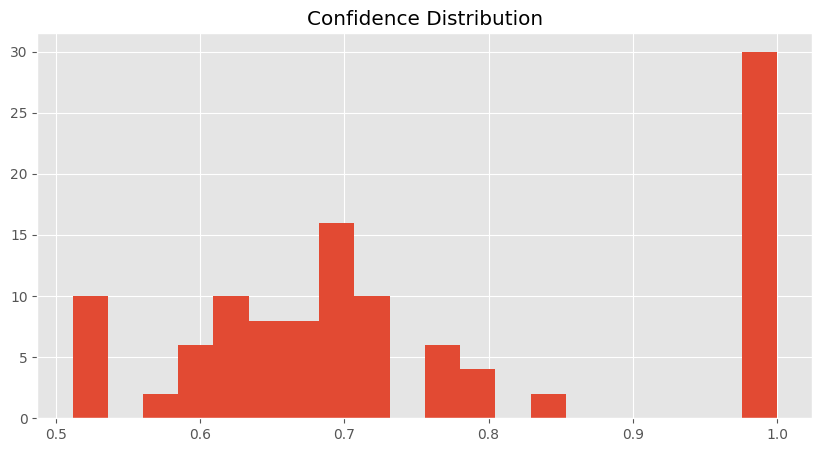

In [34]:
chart_top_products(df_products)
chart_confidence_hist(df_products)

In [35]:
df_missing = df_joined[
    df_joined["product_uuid"].notna() &
    df_joined["name"].isna()
]

df_missing




,image_url,category_id,bbox,area,score,modalities,alternate_predictions,product_uuid,product_name,product_tags,...,width,depth,brand,size,container_type,flavour,packaging_size,custom_props,created_at,updated_at
12,https://storage.googleapis.com/staging-zia-web...,0,"[1500, 2041, 442, 679]",300118,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 10, 'score': 0.44930026}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,https://storage.googleapis.com/staging-zia-web...,0,"[0, 107, 937, 257]",240809,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 2, 'score': 0.241472686}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,https://storage.googleapis.com/staging-zia-web...,0,"[24, 814, 202, 271]",54742,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 1, 'score': 0.316075836}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,https://storage.googleapis.com/staging-zia-web...,7,"[34, 374, 226, 126]",28476,NaN,"{'price': [{'score': 1.0, 'value': '3, 0.30'}]...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,https://storage.googleapis.com/staging-zia-web...,7,"[88, 1310, 234, 112]",26208,NaN,"{'price': [{'score': 1.0, 'value': '2.35, 0.52...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,https://storage.googleapis.com/staging-zia-web...,7,"[705, 1304, 207, 109]",22563,NaN,"{'price': [{'score': 1.0, 'value': '1.75, 2.40...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,https://storage.googleapis.com/staging-zia-web...,7,"[858, 380, 206, 120]",24720,NaN,"{'price': [{'score': 1.0, 'value': '3.30, 0.82...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,https://storage.googleapis.com/staging-zia-web...,0,"[879, 100, 702, 267]",187434,1.0,"{'price': [{'score': 1.0, 'value': ''}]}","[{'category_id': 8, 'score': 0.224719308}, {'c...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,https://storage.googleapis.com/staging-zia-web...,7,"[1279, 1296, 193, 104]",20072,NaN,"{'price': [{'score': 1.0, 'value': '1.75'}], '...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,https://storage.googleapis.com/staging-zia-web...,7,"[1675, 382, 194, 118]",22892,NaN,"{'price': [{'score': 1.0, 'value': '2.40, 0.80...",[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = load_results_from_folder("../data/results_json/cooler_results/")

# Step 2 - Inspect detections per image
summary = (
    df.groupby("image_url")
      .agg(
          total_detections=("category_id", "count"),
          product_detections=("product_uuid", lambda x: x.notna().sum()),
      )
)
summary["non_product_detections"] = summary["total_detections"] - summary["product_detections"]

summary

,total_detections,product_detections,non_product_detections
image_url,,,
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/135eeaad-3293-484e-bae8-2f931ec92645.jpg,17,16,1
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/5fdd22e7-a118-4ad6-9867-f3c91222b32d.jpg,51,25,26
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/96833213-9a89-47ca-aaae-8f0691f4583a.jpg,51,25,26
https://storage.googleapis.com/staging-zia-web-public/staging/ir-tasks/087d4d0c-8b3b-4d1c-abb4-c697c41db427/c2348056-e3a8-4147-a064-1f2fb8f14fc4.jpg,17,16,1
